In [1]:
# modeling training

# Importing  basic libraries for modeling training

In [2]:
#basic importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#importing libraries for modeling
#since it is classification problem import classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm  import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score
import warnings

In [3]:
df=pd.read_csv('heart (4).csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# splith the data to x variable and y variable

In [5]:
x=df.iloc[:,:-1]

In [6]:
y=df.iloc[:,-1]

# feature engineering

In [7]:
numerical_features=[features for features in x.columns if x[features].dtype!='O']
categorical_features=[features for features in x.columns if x[features].dtype=='O']

In [8]:
numerical_features

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [9]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
num_pipe=Pipeline(steps=[("impute",SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [11]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())])

In [12]:
preprocessor=ColumnTransformer([('num_pipe',num_pipe,numerical_features),
                                     ('cat_pipe',cat_pipe,categorical_features)
    
])

In [13]:
x=preprocessor.fit_transform(x)

In [14]:
x.shape

(918, 20)

# spliting the data into training data and testing data

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape

(642, 20)

In [17]:
x_test.shape

(276, 20)

In [18]:
def evalute_model(y_test,y_predict):
    score=accuracy_score(y_test,y_predict)
    f_score=f1_score(y_test,y_predict)
    precisionscore=precision_score(y_test,y_predict)
    return score,f_score,precisionscore

In [19]:
models={'logistic regresion':LogisticRegression(),
       'svm':SVC(),
       ' GaussianNB': GaussianNB(),
       'DecisionTreeClassifier':DecisionTreeClassifier(),
       'RandomForestClassifier':RandomForestClassifier(),
       'CatBoostClassifier':CatBoostClassifier(),
       'XGBRFClassifier':XGBRFClassifier()}

In [25]:
score_list=[]
f_score_list=[]
precisionscore_list=[]
Model_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_list=list(models.keys())[i]
    model.fit(x_train,y_train)
    
    y_predict=model.predict(x_test)
    score,f_score,precisionscore=evalute_model(y_test,y_predict)
    print("The score is of {} is {}".format(model_list,score))
    print("The score is of {} is {}".format(model_list,f_score))
    print("The score is of {} is {}".format(model_list,precisionscore))
    Model_list.append(model_list)
    score_list.append(score)
    f_score_list.append(f_score)
    precisionscore_list.append(precisionscore)
return score_list,f_score_list,precisionscore_list

The score is of logistic regresion is 0.8840579710144928
The score is of logistic regresion is 0.9
The score is of logistic regresion is 0.9230769230769231
The score is of svm is 0.8840579710144928
The score is of svm is 0.9030303030303031
The score is of svm is 0.8975903614457831
The score is of  GaussianNB is 0.8840579710144928
The score is of  GaussianNB is 0.8993710691823901
The score is of  GaussianNB is 0.9285714285714286
The score is of DecisionTreeClassifier is 0.75
The score is of DecisionTreeClassifier is 0.7692307692307693
The score is of DecisionTreeClassifier is 0.8518518518518519
The score is of RandomForestClassifier is 0.8659420289855072
The score is of RandomForestClassifier is 0.8854489164086686
The score is of RandomForestClassifier is 0.89937106918239
Learning rate set to 0.008526
0:	learn: 0.6860231	total: 3.41ms	remaining: 3.41s
1:	learn: 0.6799202	total: 6.88ms	remaining: 3.43s
2:	learn: 0.6732318	total: 10.2ms	remaining: 3.38s
3:	learn: 0.6670760	total: 13.4ms	r

157:	learn: 0.3073040	total: 571ms	remaining: 3.04s
158:	learn: 0.3067384	total: 575ms	remaining: 3.04s
159:	learn: 0.3061657	total: 578ms	remaining: 3.04s
160:	learn: 0.3056962	total: 582ms	remaining: 3.03s
161:	learn: 0.3048788	total: 586ms	remaining: 3.03s
162:	learn: 0.3039987	total: 589ms	remaining: 3.02s
163:	learn: 0.3032689	total: 593ms	remaining: 3.02s
164:	learn: 0.3027262	total: 597ms	remaining: 3.02s
165:	learn: 0.3020476	total: 602ms	remaining: 3.02s
166:	learn: 0.3013500	total: 606ms	remaining: 3.02s
167:	learn: 0.3007431	total: 609ms	remaining: 3.01s
168:	learn: 0.2999629	total: 613ms	remaining: 3.02s
169:	learn: 0.2994746	total: 617ms	remaining: 3.01s
170:	learn: 0.2990223	total: 620ms	remaining: 3.01s
171:	learn: 0.2980557	total: 623ms	remaining: 3s
172:	learn: 0.2975437	total: 626ms	remaining: 2.99s
173:	learn: 0.2970210	total: 631ms	remaining: 2.99s
174:	learn: 0.2964175	total: 634ms	remaining: 2.99s
175:	learn: 0.2956657	total: 637ms	remaining: 2.98s
176:	learn: 0.2

334:	learn: 0.2295559	total: 1.17s	remaining: 2.33s
335:	learn: 0.2293386	total: 1.18s	remaining: 2.33s
336:	learn: 0.2290566	total: 1.18s	remaining: 2.32s
337:	learn: 0.2286639	total: 1.19s	remaining: 2.32s
338:	learn: 0.2281885	total: 1.19s	remaining: 2.32s
339:	learn: 0.2279021	total: 1.19s	remaining: 2.31s
340:	learn: 0.2275862	total: 1.2s	remaining: 2.32s
341:	learn: 0.2273187	total: 1.2s	remaining: 2.31s
342:	learn: 0.2267407	total: 1.21s	remaining: 2.31s
343:	learn: 0.2265182	total: 1.21s	remaining: 2.3s
344:	learn: 0.2260878	total: 1.21s	remaining: 2.3s
345:	learn: 0.2257779	total: 1.22s	remaining: 2.3s
346:	learn: 0.2255711	total: 1.22s	remaining: 2.3s
347:	learn: 0.2254051	total: 1.22s	remaining: 2.29s
348:	learn: 0.2251120	total: 1.23s	remaining: 2.29s
349:	learn: 0.2247725	total: 1.23s	remaining: 2.29s
350:	learn: 0.2244781	total: 1.24s	remaining: 2.29s
351:	learn: 0.2241665	total: 1.24s	remaining: 2.28s
352:	learn: 0.2238155	total: 1.24s	remaining: 2.28s
353:	learn: 0.2236

498:	learn: 0.1901561	total: 1.77s	remaining: 1.78s
499:	learn: 0.1899360	total: 1.77s	remaining: 1.77s
500:	learn: 0.1895299	total: 1.78s	remaining: 1.77s
501:	learn: 0.1892414	total: 1.78s	remaining: 1.77s
502:	learn: 0.1889775	total: 1.79s	remaining: 1.77s
503:	learn: 0.1888545	total: 1.79s	remaining: 1.76s
504:	learn: 0.1887139	total: 1.8s	remaining: 1.76s
505:	learn: 0.1885017	total: 1.8s	remaining: 1.76s
506:	learn: 0.1882024	total: 1.8s	remaining: 1.75s
507:	learn: 0.1879613	total: 1.81s	remaining: 1.75s
508:	learn: 0.1878172	total: 1.81s	remaining: 1.75s
509:	learn: 0.1876099	total: 1.82s	remaining: 1.75s
510:	learn: 0.1874764	total: 1.82s	remaining: 1.74s
511:	learn: 0.1871698	total: 1.83s	remaining: 1.74s
512:	learn: 0.1870062	total: 1.83s	remaining: 1.74s
513:	learn: 0.1865469	total: 1.84s	remaining: 1.74s
514:	learn: 0.1863476	total: 1.84s	remaining: 1.73s
515:	learn: 0.1861470	total: 1.85s	remaining: 1.73s
516:	learn: 0.1861174	total: 1.85s	remaining: 1.73s
517:	learn: 0.1

707:	learn: 0.1523357	total: 2.56s	remaining: 1.06s
708:	learn: 0.1520935	total: 2.57s	remaining: 1.05s
709:	learn: 0.1519987	total: 2.57s	remaining: 1.05s
710:	learn: 0.1517714	total: 2.58s	remaining: 1.05s
711:	learn: 0.1516531	total: 2.58s	remaining: 1.04s
712:	learn: 0.1514990	total: 2.58s	remaining: 1.04s
713:	learn: 0.1513580	total: 2.59s	remaining: 1.04s
714:	learn: 0.1512720	total: 2.59s	remaining: 1.03s
715:	learn: 0.1510829	total: 2.6s	remaining: 1.03s
716:	learn: 0.1508753	total: 2.6s	remaining: 1.03s
717:	learn: 0.1508130	total: 2.6s	remaining: 1.02s
718:	learn: 0.1506336	total: 2.61s	remaining: 1.02s
719:	learn: 0.1504912	total: 2.61s	remaining: 1.01s
720:	learn: 0.1503615	total: 2.61s	remaining: 1.01s
721:	learn: 0.1502042	total: 2.62s	remaining: 1.01s
722:	learn: 0.1500950	total: 2.62s	remaining: 1s
723:	learn: 0.1498973	total: 2.63s	remaining: 1s
724:	learn: 0.1498055	total: 2.63s	remaining: 997ms
725:	learn: 0.1496117	total: 2.63s	remaining: 994ms
726:	learn: 0.1494937

876:	learn: 0.1285888	total: 3.17s	remaining: 444ms
877:	learn: 0.1284249	total: 3.17s	remaining: 441ms
878:	learn: 0.1283730	total: 3.18s	remaining: 437ms
879:	learn: 0.1283103	total: 3.18s	remaining: 434ms
880:	learn: 0.1281342	total: 3.18s	remaining: 430ms
881:	learn: 0.1279996	total: 3.19s	remaining: 427ms
882:	learn: 0.1279207	total: 3.19s	remaining: 423ms
883:	learn: 0.1278215	total: 3.2s	remaining: 419ms
884:	learn: 0.1277457	total: 3.2s	remaining: 416ms
885:	learn: 0.1276231	total: 3.2s	remaining: 412ms
886:	learn: 0.1274104	total: 3.21s	remaining: 409ms
887:	learn: 0.1271939	total: 3.21s	remaining: 405ms
888:	learn: 0.1270632	total: 3.21s	remaining: 401ms
889:	learn: 0.1267944	total: 3.22s	remaining: 398ms
890:	learn: 0.1266706	total: 3.22s	remaining: 394ms
891:	learn: 0.1265938	total: 3.22s	remaining: 390ms
892:	learn: 0.1264611	total: 3.23s	remaining: 387ms
893:	learn: 0.1263662	total: 3.23s	remaining: 383ms
894:	learn: 0.1262424	total: 3.23s	remaining: 379ms
895:	learn: 0.1

SyntaxError: 'return' outside function (2652541982.py, line 20)

In [27]:
print(score_list)

[0.8840579710144928, 0.8840579710144928, 0.8840579710144928, 0.75, 0.8659420289855072, 0.8840579710144928, 0.8804347826086957]


In [28]:
print(f_score_list)

[0.9, 0.9030303030303031, 0.8993710691823901, 0.7692307692307693, 0.8854489164086686, 0.901840490797546, 0.8984615384615385]


In [29]:
print(Model_list)

['logistic regresion', 'svm', ' GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 'XGBRFClassifier']


In [44]:
score_df=pd.DataFrame(score_list,columns=['score'])
model_df=pd.DataFrame(Model_list,columns=['Models'])
f_score_df=pd.DataFrame(f_score_list,columns=['f_score'])
precisionscore_df=pd.DataFrame(precisionscore_list,columns=['precision_score'])


In [45]:
model_preformance_df=pd.concat([model_df,score_df,f_score_df,precisionscore_df],axis=1)

In [54]:
model_preformance_df.set_index('Models',inplace=True)

In [57]:
model_preformance_df.sort_values(by=['score','f_score','precision_score'],ascending=False)

,score,f_score,precision_score
Models,,,
svm,0.884058,0.903030,0.897590
CatBoostClassifier,0.884058,0.901840,0.907407
logistic regresion,0.884058,0.900000,0.923077
GaussianNB,0.884058,0.899371,0.928571
XGBRFClassifier,0.880435,0.898462,0.906832
RandomForestClassifier,0.865942,0.885449,0.899371
DecisionTreeClassifier,0.750000,0.769231,0.851852


In [58]:
#by above model logitic regression is best model for the prediction


# logistic regression

In [63]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
log_predict=log_model.predict(x_test)
log_score=accuracy_score(y_test,y_predict)
log_f1_score=f1_score(y_test,y_predict)
log_precision_score=precision_score(y_test,y_predict)
log_classifiaction_score=classification_report(y_test,y_predict)
print("The accuracy score of logistic regression is {}".format(log_score))
print("The f1 score of logistic regression is {}".format(log_f1_score))
print("The precision score of logistic regression is {}".format(log_precision_score))
print("The classifiaction report of logistic regression is {}".format(log_classifiaction_score))


The accuracy score of logistic regression is 0.8804347826086957
The f1 score of logistic regression is 0.8984615384615385
The precision score of logistic regression is 0.906832298136646
The classifiaction report of logistic regression is               precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



<AxesSubplot: >

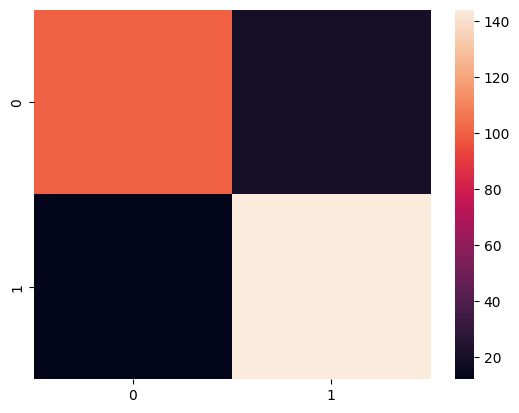

In [64]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(log_predict,y_test))

In [66]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [67]:
#since the model is good prediction